<a href="https://colab.research.google.com/github/SumayyaShaji/project1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# dataset

In [5]:
df = pd.read_csv('covid.csv',encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,title,text,subcategory,label
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news,0
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true,1
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true,1
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false,0
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: WEVE ...,Locking down much of the country may have help...,false news,0


In [6]:
df.shape


(3119, 5)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3119 non-null   int64 
 1   title        3118 non-null   object
 2   text         3119 non-null   object
 3   subcategory  3119 non-null   object
 4   label        3119 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 122.0+ KB


In [8]:
df.describe()


,Unnamed: 0,label
count,3119.000000,3119.000000
mean,1447.314203,0.660789
std,893.567167,0.473518
min,0.000000,0.000000
25%,663.500000,0.000000
50%,1443.000000,1.000000
75%,2222.500000,1.000000
max,3002.000000,1.000000


In [9]:
df.isnull().mean()


Unnamed: 0     0.000000
title          0.000321
text           0.000000
subcategory    0.000000
label          0.000000
dtype: float64

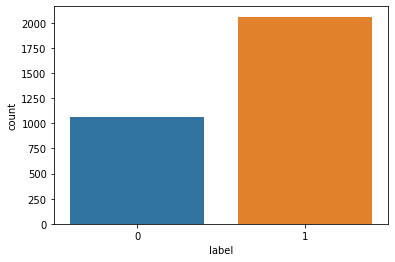

In [11]:
sns.countplot('label',data=df)


Dependent and Independent variables


In [12]:
X=df.drop('label',axis=1)


In [13]:
y=df['label']


In [14]:
X.head()


,Unnamed: 0,title,text,subcategory
0,0,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,false news
1,1,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,true
2,2,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,true
3,3,Purdue University says students face 'close to...,"Purdue University President Mitch Daniels, the...",partially false
4,4,THE HIGH COST OF LOCKING DOWN AMERICA: WEVE ...,Locking down much of the country may have help...,false news


In [15]:
y.head()


0    0
1    1
2    1
3    0
4    0
Name: label, dtype: int64

In [16]:
import tensorflow as tf


In [17]:
tf.__version__


'2.7.0'

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [19]:
#Vocab size

voc_size=5000
messages=X.copy()


Data cleaning/preprocessing


In [24]:
#Text data cleaning

import re
import nltk

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)


LookupError: ignored